<a href="https://colab.research.google.com/github/Waltberry/Computer_Vision-Coin_Identification/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()




Saving marcel-strauss-Coins.jpg to marcel-strauss-Coins.jpg


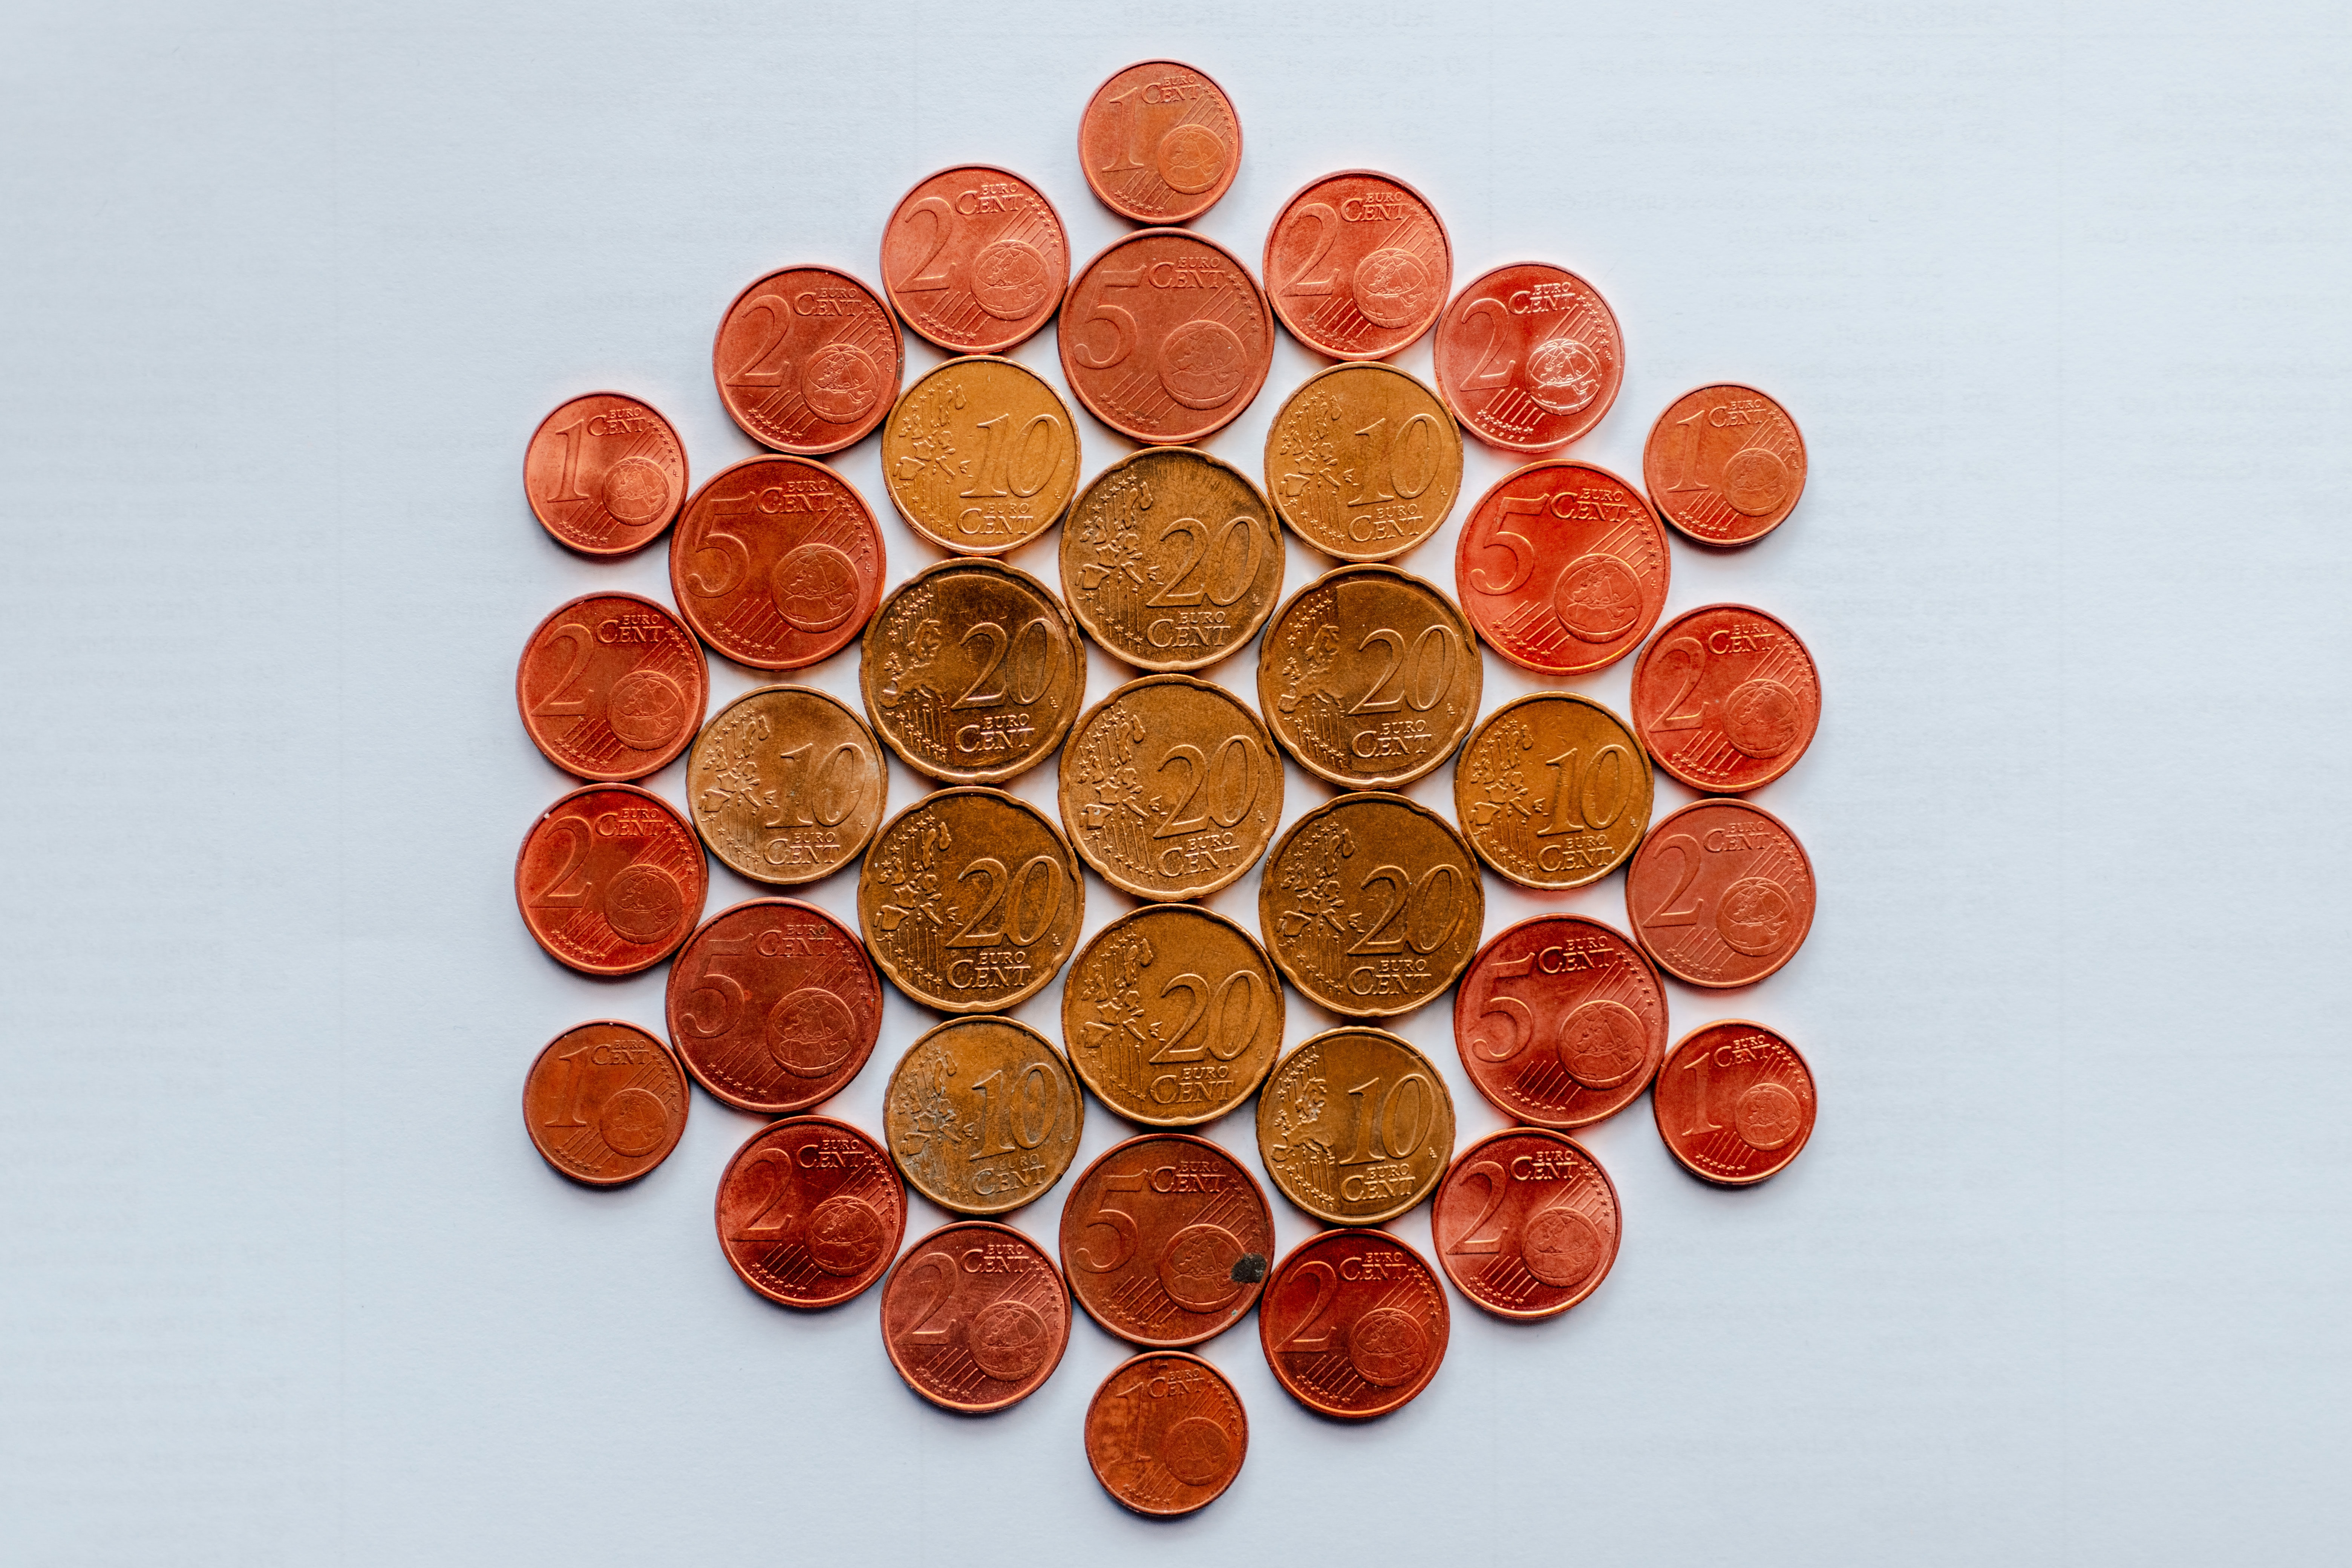

In [69]:
Image('marcel-strauss-Coins.jpg', width=500)
#Credit to https://unsplash.com/@martzzl/collections for the beautiful image.

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def av_pix(img,circles,size):
     av_value = []
     for coords in circles[0,:]:
         col = np.mean(img[coords[1]-size:coords[1]+size,coords[0]-size:coords[0]+size])
         #print(img[coords[1]-size:coords[1]+size,coords[0]-size:coords[0]+size])
         av_value.append(col)
     return av_value   


def get_radius(circles):
     radius = []
     for coords in circles[0,:]:
         radius.append(coords[2])    
     return radius

img = cv2.imread('marcel-strauss-Coins.jpg',cv2.IMREAD_GRAYSCALE)
original_image = cv2.imread('marcel-strauss-Coins.jpg',1)
img = cv2.GaussianBlur(img, (5,5), 0)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,0.9,120,param1=50,param2=27,minRadius=60,maxRadius=120)

print(circles)

circles = np.uint16(np.around(circles))
count = 1
for i in circles[0,:]:
  
     # draw the outer circle
     cv2.circle(original_image,(i[0],i[1]),i[2],(0,255,0),2)
     # draw the center of the circle
     cv2.circle(original_image,(i[0],i[1]),2,(0,0,255),3)
     cv2.putText(original_image, str(count),(i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)
     count += 1

radii = get_radius(circles)
print(radii)

bright_values = av_pix(img,circles,20)
print(bright_values)

values = []
for a,b in zip(bright_values,radii):
     if a > 150 and b > 110:
         values.append(10)
     elif a > 150 and b <= 110:
         values.append(5)
     elif a < 150 and b > 110:
         values.append(2)
     elif a < 150 and b < 110:
         values.append(1)        
print(values)           
count_2 = 0
for i in circles[0,:]:
    
     cv2.putText(original_image, str(values[count_2]) + 'p',(i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2)
     count_2 += 1
cv2.putText(original_image, 'ESTIMATED TOTAL VALUE: ' + str(sum(values)) + 'p', (200,100), cv2.FONT_HERSHEY_SIMPLEX, 1.3, 255)




cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()